# Ridge Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

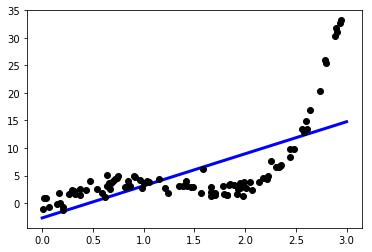

In [4]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Proszę wykonać regresję (Ridge Regression) oraz klasyczną regresję z różną ilosćią parametrów oraz stopniem wielomianu. 

In [5]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.Ridge(alpha=1.0)))
models.append(('Ridge LR', linear_model.Ridge(alpha=20.0)))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=10.0)) ))
models.append(('PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 110', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.Ridge(alpha=10.0)) ))

In [6]:
x_plot = np.vstack(np.linspace(0, 3, 100))

for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)

LR
Ridge LR
Ridge LR
PR degree 2
Ridge PR degree 2
PR degree 3
Ridge PR degree 3
PR degree 4
Ridge PR degree 4
PR degree 110
Ridge PR degree 10


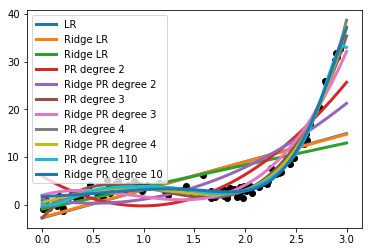

In [7]:
x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
plt.legend()    
plt.show()



In [8]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.Ridge(alpha=1.0)))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=10.0)) ))
models.append(('PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 110', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.Ridge(alpha=10.0)) ))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [9]:
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: -4.361311 (0.841515)
Ridge LR: -4.328625 (0.854231)
PR degree 2: -3.383476 (0.557643)
Ridge PR degree 2: -3.586149 (0.505549)
PR degree 3: -1.104479 (0.249783)
Ridge PR degree 3: -1.845262 (0.406899)
PR degree 4: -0.806548 (0.201070)
Ridge PR degree 4: -0.889543 (0.191518)
PR degree 110: -0.838787 (0.167946)
Ridge PR degree 10: -0.934399 (0.214390)


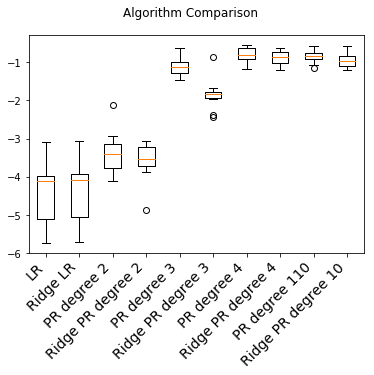

In [10]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)
plt.show()  

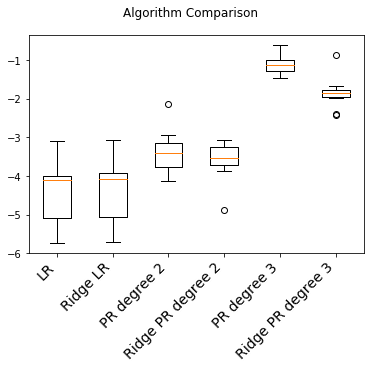

In [11]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results[0:6])
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)

plt.show() 

# Zdanie 
Zinterpretuj wyniki. 

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.1, 1, 2]},
                    cv=5,
                    refit=False)
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 4, 'ridge__alpha': 0.1}